In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [14]:
Powerplant = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
Powerplant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [15]:
Powerplant.shape

(907, 27)

In [16]:
Powerplant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [17]:
Powerplant.columns.to_frame('powerplant column list')

,0
country,country
country_long,country_long
name,name
gppd_idnr,gppd_idnr
capacity_mw,capacity_mw
latitude,latitude
longitude,longitude
primary_fuel,primary_fuel
other_fuel1,other_fuel1
other_fuel2,other_fuel2


In [18]:
Powerplant = Powerplant.dropna(axis=1, thresh=100)

In [19]:
Powerplant.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

i have dropped columns where i am having upto 100 missing value, now filling the NAN

In [20]:
Powerplant.nunique().to_frame('tootal number of unique')

,tootal number of unique
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
other_fuel1,3
commissioning_year,73


In [21]:
fill =['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','longitude','latitude',]

In [22]:
Powerplant[fill]=Powerplant[fill].fillna(Powerplant[fill].mean())

In [23]:
fill2 = ['generation_data_source','geolocation_source','year_of_capacity_data','owner','commissioning_year','other_fuel1']

In [24]:
Powerplant[fill2]=Powerplant[fill2].fillna(Powerplant[fill2].mode())

In [25]:
Powerplant.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,527.000000,520.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,17.082868,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2001.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2012.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [26]:
Powerplant['generation_data_source'].unique

<bound method Series.unique of 0      Central Electricity Authority
1                                NaN
2                                NaN
3      Central Electricity Authority
4      Central Electricity Authority
                   ...              
902    Central Electricity Authority
903                              NaN
904                              NaN
905                              NaN
906                              NaN
Name: generation_data_source, Length: 907, dtype: object>

In [27]:
Powerplant['year_of_capacity_data']=Powerplant['year_of_capacity_data'].fillna(2019.0)

In [28]:
Powerplant.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,527.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,17.082868,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2001.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2012.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [29]:
Powerplant['commissioning_year']=Powerplant['commissioning_year'].fillna(Powerplant['commissioning_year'].mode()[0])

In [30]:
Powerplant.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               708
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    457
dtype: int64

In [31]:
Powerplant.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,15.734928,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2014.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2015.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [32]:
fill3 = ['owner','other_fuel1','geolocation_source','generation_data_source']

In [34]:
Powerplant[fill3]=Powerplant[fill3].fillna(Powerplant[fill3].mode())

In [35]:
Powerplant.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               708
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    457
dtype: int64

In [36]:
Powerplant['other_fuel1']=Powerplant['other_fuel1'].fillna(Powerplant['other_fuel1'].mode()[0])

In [37]:
Powerplant.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    457
dtype: int64

In [38]:
Powerplant['owner']=Powerplant['owner'].fillna(Powerplant['owner'].mode()[0])

In [39]:
Powerplant['geolocation_source']=Powerplant['geolocation_source'].fillna(Powerplant['geolocation_source'].mode()[0])

In [40]:
Powerplant['generation_data_source']=Powerplant['generation_data_source'].fillna('Central Electricity Authority')

In [41]:
Powerplant.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [42]:
Powerplant.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,15.734928,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2014.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2015.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


<AxesSubplot:>

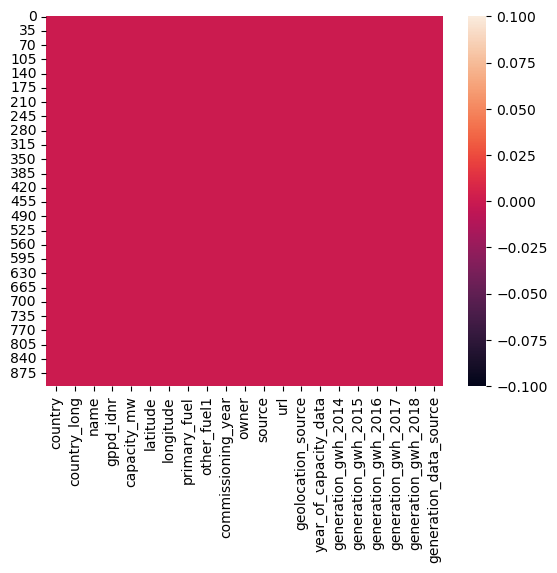

In [43]:
sns.heatmap(Powerplant.isnull())

In [44]:
label_encoder = OrdinalEncoder()
for i in Powerplant.columns:
     if Powerplant[i].dtypes=='object':
        Powerplant[i]=label_encoder.fit_transform(Powerplant[i].values.reshape(-1,1))

In [45]:
Powerplant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    float64
 1   country_long            907 non-null    float64
 2   name                    907 non-null    float64
 3   gppd_idnr               907 non-null    float64
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    float64
 8   other_fuel1             907 non-null    float64
 9   commissioning_year      907 non-null    float64
 10  owner                   907 non-null    float64
 11  source                  907 non-null    float64
 12  url                     907 non-null    float64
 13  geolocation_source      907 non-null    float64
 14  year_of_capacity_data   907 non-null    fl

Now because I want to use PCA method so i go straight to standardize the data.and just before that i will separate my label from the features

In [46]:
Features = Powerplant.drop(columns = ['primary_fuel'])
Label = Powerplant['primary_fuel']

In [47]:
scaler = StandardScaler()
Features = pd.DataFrame(scaler.fit_transform(Features),columns = Features.columns)
Features

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,0.0,-1.730142,0.779137,-0.548908,1.149805,-0.878280,0.054303,0.407327,2.095328,1.460215,0.476673,-1.083349,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0
1,0.0,0.0,-1.726323,0.252074,-0.386977,0.587311,-0.593788,0.054303,0.661679,2.446913,2.917019,1.116401,0.394241,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0
2,0.0,0.0,-1.722504,1.527719,-0.486679,0.116179,-1.682394,0.054303,0.661679,-0.656734,-0.512075,1.571318,0.394241,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0
3,0.0,0.0,-1.718684,-1.730142,-0.324240,0.439989,2.889052,0.054303,-0.037788,-0.620363,-0.489662,-0.518459,0.394241,0.0,-6.809773e-01,-0.554446,-0.549988,-6.452243e-01,-6.518573e-01,0.0
4,0.0,0.0,-1.714865,-1.726323,2.498942,0.125479,1.027976,0.054303,0.661679,-0.620363,-0.489662,-0.518459,0.394241,0.0,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,1.714865,0.145133,2.159821,-0.806975,-0.022477,0.054303,0.725267,-0.620363,-0.489662,-0.518459,0.394241,0.0,1.707094e-16,-0.849344,-0.776810,-5.761719e-01,-6.319636e-01,0.0
903,0.0,0.0,1.718684,1.409321,-0.548060,-1.366853,0.145644,0.054303,0.661679,0.701112,0.743019,-1.030242,-2.560940,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0
904,0.0,0.0,1.722504,1.672853,-0.509909,-0.974707,-0.391673,0.054303,0.661679,-0.620363,-0.512075,2.353208,0.394241,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0
905,0.0,0.0,1.726323,0.328460,-0.417498,0.518793,-0.772866,0.054303,0.661679,0.422268,0.339596,-0.177271,0.394241,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0


In [48]:
Pca = PCA()
Pca.fit_transform(Features)

array([[-4.20877070e-01,  2.68358311e+00, -2.02389849e+00, ...,
         8.87044555e-17,  0.00000000e+00,  0.00000000e+00],
       [-3.76868462e-01,  2.89842623e+00, -1.45406255e+00, ...,
         3.68237919e-17,  0.00000000e+00,  0.00000000e+00],
       [-2.90055076e-01,  1.19710360e+00,  4.51166044e-01, ...,
        -2.06960551e-17, -0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.75183627e-01,  1.46913487e+00,  2.90096187e+00, ...,
         3.32987032e-18,  0.00000000e+00,  0.00000000e+00],
       [-9.14453661e-02,  9.10701063e-01,  5.65677731e-01, ...,
         1.34811268e-19,  0.00000000e+00,  0.00000000e+00],
       [-2.95501523e-01,  2.80519728e+00,  3.17065829e+00, ...,
         1.05563762e-18,  0.00000000e+00, -0.00000000e+00]])

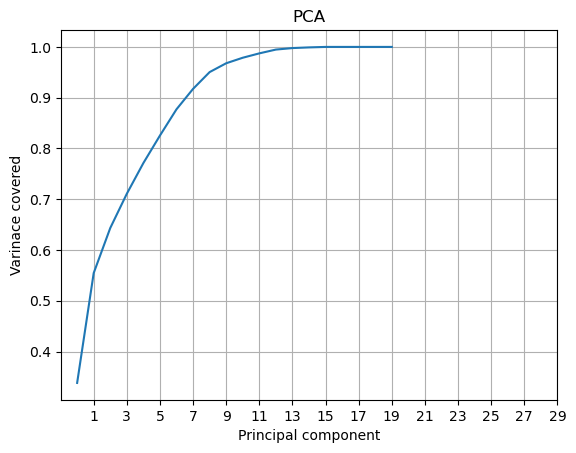

In [49]:
plt.figure()
plt.plot(np.cumsum(Pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,31,2))
plt.xlabel('Principal component')
plt.ylabel('Varinace covered')
plt.title('PCA')
plt.show()

I am choosing 12 component in building my model i Am good to choose this because it cover 70% of the data variance

In [50]:
Pca = PCA(n_components = 12)
New_pcomp = Pca.fit_transform(Features)
New_Features = pd.DataFrame(New_pcomp)
New_Features


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.420877,2.683583,-2.023898,-0.512600,0.813398,0.478348,0.064223,-0.899950,0.141972,-0.143067,-0.744488,0.178822
1,-0.376868,2.898426,-1.454063,-0.975845,0.622510,1.472503,0.956803,-2.088779,-0.802576,0.143496,0.117701,0.013779
2,-0.290055,1.197104,0.451166,-2.070620,1.953685,-0.719872,-0.562193,0.304902,0.417547,-0.382192,0.116039,-0.315083
3,-1.241107,-2.586623,-1.425388,-0.774714,-0.496891,0.373185,2.280814,-0.224676,0.943018,-0.052926,0.034788,0.108791
4,3.207312,-1.894869,-1.229241,-1.122202,0.514195,0.634565,1.296365,0.478882,-0.412358,1.107895,-0.413172,-0.053864
...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.276542,-0.793954,1.345398,0.661441,-0.870754,-0.544749,0.109811,1.328324,-1.557729,1.402362,-0.053480,0.993376
903,-0.238229,2.172132,0.145154,1.997441,-1.556441,0.541746,-0.343397,2.045058,0.580338,-0.154580,-0.034849,-0.006773
904,-0.175184,1.469135,2.900962,-0.498492,-0.178944,-1.327169,-0.160648,0.275863,0.553953,0.269262,0.828693,-0.290190
905,-0.091445,0.910701,0.565678,0.738852,-0.535803,-0.885594,-0.403312,-0.231332,-1.275354,-0.448391,0.216042,-0.214127


In [51]:
Powerplant['primary_fuel'].nunique

<bound method IndexOpsMixin.nunique of 0      6.0
1      1.0
2      7.0
3      2.0
4      1.0
      ... 
902    1.0
903    6.0
904    7.0
905    1.0
906    7.0
Name: primary_fuel, Length: 907, dtype: float64>

This is class-class classification project

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [53]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(New_Features,Label,test_size = .30, random_state = i)
    rfc= RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.9118072432867643 
 random state =  182


In [54]:
x_train,x_test,y_train,y_test = train_test_split(New_Features,Label, test_size = 0.30, random_state = MaxRS)

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor as DT

In [56]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rfr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rfr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rfr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.8867239343064605
R2 score on training Data: 97.75516093125938
Mean absolute Error: 0.4851648351648351
Mean squared Error: 0.6116260073260074
Root mean squared Error: 0.782065219355782


In [57]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.7698887263629465
R2 score on training Data: 72.15231804186013
Mean absolute Error: 0.8693116636004322
Mean squared Error: 1.2424693484332445
Root mean squared Error: 1.1146610912888475


In [58]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
pred_train = rf.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rf))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rf))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rf))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rf)))

R2 score: 0.9185913014954749
R2 score on training Data: 100.0
Mean absolute Error: 0.2271062271062271
Mean squared Error: 0.43956043956043955
Root mean squared Error: 0.6629935441317959


In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
score1 = cross_val_score(rfr,New_Features,Label,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference =',(r2_score(y_test,pred_rfr)-score1.mean()))

[0.7918911  0.74682863 0.77953272 0.88739239 0.83195781]
0.8075205283439406
difference = 0.07920340596251985


In [61]:
score2 = cross_val_score(lr,New_Features,Label,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('difference =',(r2_score(y_test,pred_lr)-score2.mean()))

[ 6.56420482e-01  7.02876581e-01  6.90098928e-01  7.51307427e-01
 -1.38501531e+03]
-276.44292064641866
difference = 277.2128093727816


In [62]:
score3 = cross_val_score(rf,New_Features,Label,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('difference =',(r2_score(y_test,pred_rf)-score3.mean()))

[0.84426097 0.86425449 0.72076389 0.81993249 0.81778883]
0.813400135037434
difference = 0.10519116645804083


I am choosing rfr as my final model since it has less difference in the accuracy score and the cross validation score so i will apply hyper parameter tunning on this mopdel so i can achieve more efficient model

In [63]:
from sklearn.model_selection import GridSearchCV
params_grid = {'n_estimators':[20,56,70,15,90],
             'max_depth': [ 10,25,56,70,85,100],
             'min_samples_split':[1,2],
             'max_features':[2,50,70,4,200,250],
              'bootstrap':[True,False]
             }
grid_search =GridSearchCV(estimator=rfr, param_grid = params_grid, cv = 5)


In [64]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 25, 56, 70, 85, 100],
                         'max_features': [2, 50, 70, 4, 200, 250],
                         'min_samples_split': [1, 2],
                         'n_estimators': [20, 56, 70, 15, 90]})

In [65]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'bootstrap': False, 'max_depth': 56, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 15}


In [66]:
rfr_final = RandomForestRegressor(bootstrap = False, n_estimators= 70, max_depth= 100, min_samples_split= 2, max_features = 4)
rfr_final

RandomForestRegressor(bootstrap=False, max_depth=100, max_features=4,
                      n_estimators=70)

In [67]:
rfr_final.fit(x_train,y_train)
my_prediction = rfr_final.predict(x_test)
print ('R2 score:', r2_score(y_test,my_prediction))
print ('Mean absolute Error:', mean_absolute_error(y_test,my_prediction))
print ('Mean squared Error:', mean_squared_error(y_test,my_prediction))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,my_prediction)))

R2 score: 0.8996473035232373
Mean absolute Error: 0.4881737310308739
Mean squared Error: 0.541847200418629
Root mean squared Error: 0.736102710508954


In [71]:
import joblib
import pickle
filename = 'powerplant.pkl'
pickle.dump(rfr_final,open(filename,'wb'))

In [72]:
import pickle
loaded_rfr_final=pickle.load(open(filename,'rb'))
result = loaded_rfr_final.score(x_test,y_test)
print(result*100)

89.96473035232373


In [73]:
Features2 = Powerplant.drop(columns = ['capacity_mw'])
Label2 = Powerplant['capacity_mw']

In [74]:
scaler = StandardScaler()
Features2 = pd.DataFrame(scaler.fit_transform(Features2),columns = Features2.columns)
Features2

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,0.0,-1.730142,0.779137,1.149805,-0.878280,1.225688,0.054303,0.407327,2.095328,1.460215,0.476673,-1.083349,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0
1,0.0,0.0,-1.726323,0.252074,0.587311,-0.593788,-0.967877,0.054303,0.661679,2.446913,2.917019,1.116401,0.394241,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0
2,0.0,0.0,-1.722504,1.527719,0.116179,-1.682394,1.664401,0.054303,0.661679,-0.656734,-0.512075,1.571318,0.394241,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0
3,0.0,0.0,-1.718684,-1.730142,0.439989,2.889052,-0.529164,0.054303,-0.037788,-0.620363,-0.489662,-0.518459,0.394241,0.0,-6.809773e-01,-0.554446,-0.549988,-6.452243e-01,-6.518573e-01,0.0
4,0.0,0.0,-1.714865,-1.726323,0.125479,1.027976,-0.967877,0.054303,0.661679,-0.620363,-0.489662,-0.518459,0.394241,0.0,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,1.714865,0.145133,-0.806975,-0.022477,-0.967877,0.054303,0.725267,-0.620363,-0.489662,-0.518459,0.394241,0.0,1.707094e-16,-0.849344,-0.776810,-5.761719e-01,-6.319636e-01,0.0
903,0.0,0.0,1.718684,1.409321,-1.366853,0.145644,1.225688,0.054303,0.661679,0.701112,0.743019,-1.030242,-2.560940,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0
904,0.0,0.0,1.722504,1.672853,-0.974707,-0.391673,1.664401,0.054303,0.661679,-0.620363,-0.512075,2.353208,0.394241,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0
905,0.0,0.0,1.726323,0.328460,0.518793,-0.772866,-0.967877,0.054303,0.661679,0.422268,0.339596,-0.177271,0.394241,0.0,1.707094e-16,0.000000,0.000000,-1.557412e-16,1.501244e-16,0.0


In [75]:
Pca = PCA()
Pca.fit_transform(Features2)

array([[-7.51457171e-02,  2.86546566e+00, -1.88376491e+00, ...,
         2.27803536e-17,  0.00000000e+00,  0.00000000e+00],
       [ 9.51077028e-02,  2.26554376e+00, -2.23995238e+00, ...,
        -1.73830889e-18,  0.00000000e+00,  0.00000000e+00],
       [-1.43758775e-01,  1.76080964e+00,  1.15948676e+00, ...,
        -1.48754269e-18, -0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.32888536e-03,  2.01898790e+00,  3.19556937e+00, ...,
         3.42390435e-19,  0.00000000e+00,  0.00000000e+00],
       [ 2.00877766e-01,  4.43739210e-01,  5.59228317e-02, ...,
         1.46584559e-19,  0.00000000e+00,  0.00000000e+00],
       [ 1.84867211e-02,  3.22075321e+00,  2.95292100e+00, ...,
        -9.11761051e-21,  0.00000000e+00, -0.00000000e+00]])

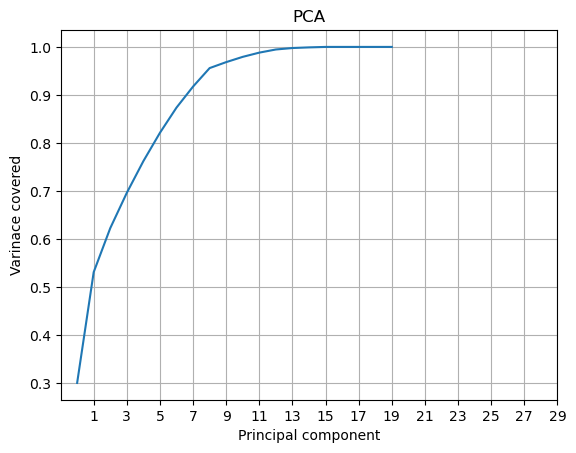

In [76]:
plt.figure()
plt.plot(np.cumsum(Pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,31,2))
plt.xlabel('Principal component')
plt.ylabel('Varinace covered')
plt.title('PCA')
plt.show()

I am choosing 12 component in building my model i Am good to choose this because it cover 70% of the data variance

In [77]:
Pca2 = PCA(n_components = 12)
New_pcomp2 = Pca2.fit_transform(Features2)
New_Features2 = pd.DataFrame(New_pcomp2)
New_Features2

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.075146,2.865466,-1.883765,-0.984475,-0.104574,0.862999,-0.179415,-0.075532,0.993503,-0.853251,0.188879,-0.022060
1,0.095108,2.265544,-2.239952,1.035152,-1.646816,1.866448,0.205023,-1.075901,1.528003,0.068532,-0.154018,-0.104156
2,-0.143759,1.760810,1.159487,-2.600406,-0.572482,1.243076,0.057723,-0.342074,-0.337701,-0.112803,-0.677478,-0.628927
3,-1.387851,-2.607347,-1.300837,-0.381494,-0.970739,0.104039,1.552809,1.656272,0.954727,-0.040623,0.165543,0.329350
4,2.377455,-2.083386,-1.124730,-0.629253,-1.038268,1.045938,0.665296,0.782097,-0.138439,0.170806,0.767126,-0.073223
...,...,...,...,...,...,...,...,...,...,...,...,...
902,-1.090951,-0.609874,0.937348,1.422942,-0.017301,-0.759868,0.289049,-0.397282,-1.527338,0.293901,-0.274475,0.257295
903,0.055901,2.389960,-0.002311,1.244473,1.299934,-1.553447,-0.883460,1.908328,-1.251610,-0.100588,0.180160,0.190447
904,0.004329,2.018988,3.195569,-0.439550,-0.084272,-0.794393,0.579663,-0.077724,-0.163647,0.874976,-0.215555,-0.007712
905,0.200878,0.443739,0.055923,1.287736,0.242419,-0.638534,0.310809,-1.635525,-0.787281,0.114404,0.115081,0.054659


In [78]:
Powerplant['capacity_mw'].nunique()

361

In [79]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(New_Features2,Label2,test_size = .30, random_state = i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.8473372883809701 
 random state =  92


In [80]:
x_train,x_test,y_train,y_test = train_test_split(New_Features2,Label2, test_size = 0.30, random_state = MaxRS)

In [81]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rfr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rfr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rfr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.8420420434108552
R2 score on training Data: 96.20460992330409
Mean absolute Error: 146.56777380952383
Mean squared Error: 83995.52434320824
Root mean squared Error: 289.81981357941737


In [82]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.8473372883809701
R2 score on training Data: 67.26920884143213
Mean absolute Error: 193.26623329376963
Mean squared Error: 81179.73153735785
Root mean squared Error: 284.92057057600783


In [83]:
kn = KNN()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
pred_train = kn.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_kn))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_kn))
print ('Mean squared Error:', mean_squared_error(y_test,pred_kn))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_kn)))

R2 score: 0.8065890197259131
R2 score on training Data: 80.11750820356447
Mean absolute Error: 160.77030476190475
Mean squared Error: 102847.9796311335
Root mean squared Error: 320.6992042882762


In [84]:
scores1 = cross_val_score(rfr,New_Features2,Label2,cv=5,scoring='r2')
print(scores1)
print(scores1.mean())
print('difference =',(r2_score(y_test,pred_rfr)-scores1.mean()))

[0.77066489 0.81898244 0.79728999 0.80631206 0.81205914]
0.8010617038387254
difference = 0.040980339572129765


In [85]:
scores2 = cross_val_score(lr,New_Features2,Label2,cv=5,scoring='r2')
print(scores2)
print(scores2.mean())
print('difference =',(r2_score(y_test,pred_lr)-scores2.mean()))

[ 7.36986471e-01  7.01159761e-01  7.30206054e-01  7.67088762e-01
 -2.45356663e+03]
-490.1262378952753
difference = 490.9735751836563


In [86]:
scores3 = cross_val_score(kn,New_Features2,Label2,cv=5,scoring='r2')
print(scores3)
print(scores3.mean())
print('difference =',(r2_score(y_test,pred_kn)-scores3.mean()))

[0.7344003  0.74907464 0.72450502 0.81663907 0.83634628]
0.7721930612625402
difference = 0.034395958463372955


I am choosing rfr as my final model since it has less difference in the accuracy score and the cross validation score so i will apply hyper parameter tunning on this mopdel so i can achieve more efficient model

In [87]:
from sklearn.model_selection import GridSearchCV
params_grid = {'n_estimators':[20,56,70,15,90],
             'max_depth': [ 10,25,56,70,85,100],
             'min_samples_split':[1,2],
             'max_features':[2,50,70,4,200,250],
              'bootstrap':[True,False]
             }
grid_search =GridSearchCV(estimator=rfr, param_grid = params_grid, cv = 5)


In [88]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 25, 56, 70, 85, 100],
                         'max_features': [2, 50, 70, 4, 200, 250],
                         'min_samples_split': [1, 2],
                         'n_estimators': [20, 56, 70, 15, 90]})

In [89]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'bootstrap': True, 'max_depth': 70, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 90}


In [90]:
rfr_final2 = RandomForestRegressor(bootstrap = True, n_estimators= 70, max_depth= 85, min_samples_split= 2, max_features = 4)
rfr_final2

RandomForestRegressor(max_depth=85, max_features=4, n_estimators=70)

In [91]:
rfr_final2.fit(x_train,y_train)
my_prediction2 = rfr_final2.predict(x_test)
print ('R2 score:', r2_score(y_test,my_prediction2))
print ('Mean absolute Error:', mean_absolute_error(y_test,my_prediction2))
print ('Mean squared Error:', mean_squared_error(y_test,my_prediction2))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,my_prediction2)))

R2 score: 0.7662731441636574
Mean absolute Error: 166.52360544217686
Mean squared Error: 124286.29891767148
Root mean squared Error: 352.54262000171195


In [92]:
import joblib
import pickle
filename = 'powerplant2.pkl'
pickle.dump(rfr_final2,open(filename,'wb'))

In [94]:
import pickle
loaded_rfr_final2=pickle.load(open(filename,'rb'))
result2 = loaded_rfr_final2.score(x_test,y_test)
print(result2*100)

76.62731441636575
